In [1]:
import re
import unicodedata
import pandas as pd
import nltk

from prepare import basic_clean, lemmatize, remove_stopwords

In [2]:
df = pd.read_csv('./spam_clean.csv')
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
def clean(text):
    return remove_stopwords(lemmatize(basic_clean(text)))



In [4]:
df.text = df.text.apply(clean)

In [5]:
df.head()

,label,text
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though


In [81]:
ham_words

"go jurong point crazy available bugis n great world la e buffet cine got amore wat ok lar joking wif u oni u dun say early hor u c already say nah think go usf life around though even brother like speak treat like aid patent per request 'melle melle oru minnaminunginte nurungu vettam' ha set callertune caller press 9 copy friend callertune i'm gonna home soon want talk stuff anymore tonight k i've cried enough today i've searching right word thank breather promise wont take help granted fulfil promise wonderful blessing time date sunday oh ki'm watching eh u remember 2 spell name yes v naughty make v wet fine thataos way u feel thataos way gota b seriously spell name ium going try 2 month ha ha joking pay first lar da stock comin aft finish lunch go str lor ard 3 smth lor u finish ur lunch already ffffffffff alright way meet sooner forced eat slice i'm really hungry tho suck mark getting worried know i'm sick turn pizza lol lol always convincing catch bus frying egg make tea eating mo

In [6]:
ham_words = ' '.join(df[df.label == 'ham'].text)
spam_words = ' '.join(df[df.label == 'spam'].text)
all_words = ' '.join(df.text)

In [9]:
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [11]:
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))



In [18]:
word_counts.sort_values(by='all', ascending=False).head()


,all,ham,spam
u,1196,1041,155
call,600,241,359
2,478,305,173
get,397,314,83
ur,384,240,144


In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Proportion of Spam vs Ham for the 20 most common words')

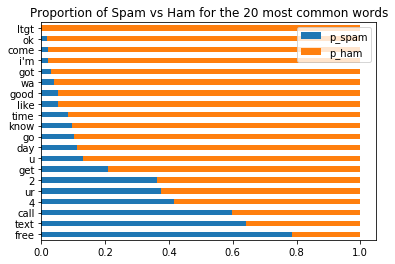

In [21]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_spam=word_counts.spam / word_counts['all'],
         p_ham=word_counts.ham / word_counts['all'])
 .sort_values(by='all')
 [['p_spam', 'p_ham']]
 .tail(20)
 .sort_values('p_ham')
 .plot.barh(stacked=True))

plt.title('Proportion of Spam vs Ham for the 20 most common words')


In [22]:
(word_counts
 [(word_counts.spam > 10) & (word_counts.ham > 10)]
 .assign(ratio=lambda df: df.spam / (df.ham + .01))
 .sort_values(by='ratio')
 .pipe(lambda df: pd.concat([df.head(), df.tail()])))

,all,ham,spam,ratio
good,235,223,12,0.053809
like,245,232,13,0.056032
need,181,170,11,0.064702
dont,140,129,11,0.085265
time,232,213,19,0.089198
contact,70,14,56,3.997145
win,76,15,61,4.063957
cash,74,12,62,5.162365
mobile,150,15,135,8.994004
txt,163,13,150,11.529593


In [37]:
from wordcloud import WordCloud


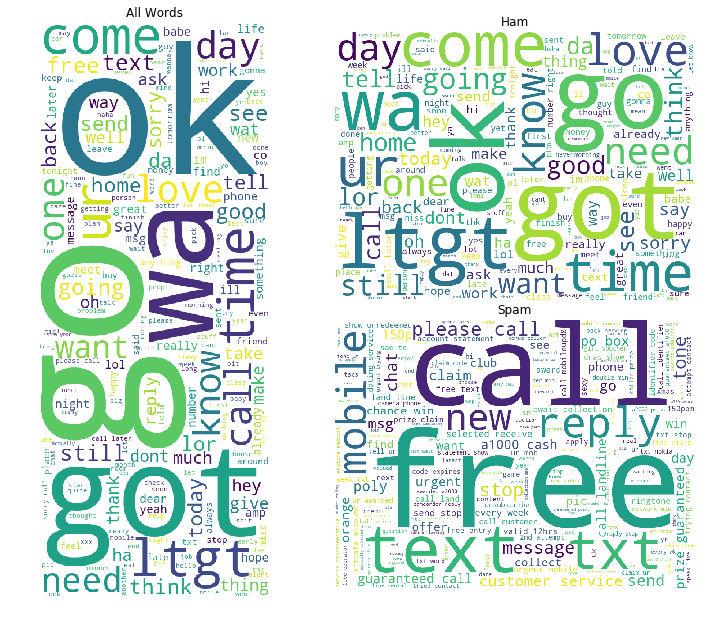

In [28]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(all_words)
ham_cloud = WordCloud(background_color='white', height=600, width=800).generate(ham_words)
spam_cloud = WordCloud(background_color='white', height=600, width=800).generate(spam_words)

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(ham_cloud)
axs[2].imshow(spam_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Ham')
axs[2].set_title('Spam')

for ax in axs: ax.axis('off')


In [41]:
top_20_ham_bigrams = (pd.Series(nltk.ngrams(ham_words.split(), 2))
                      .value_counts()
                      .head(20))

top_20_spam_bigrams = (pd.Series(nltk.ngrams(spam_words.split(), 2))
                      .value_counts()
                      .head(20))

top_20_all_bigrams = (pd.Series(nltk.ngrams(all_words.split(), 2))
                      .value_counts()
                      .head(20))

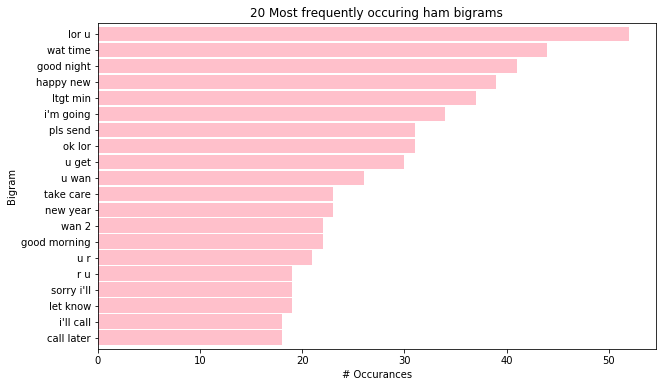

In [35]:
top_20_ham_bigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)


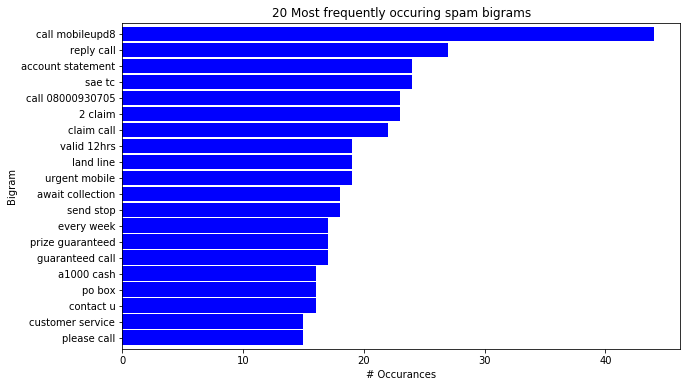

In [39]:
top_20_spam_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_spam_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)


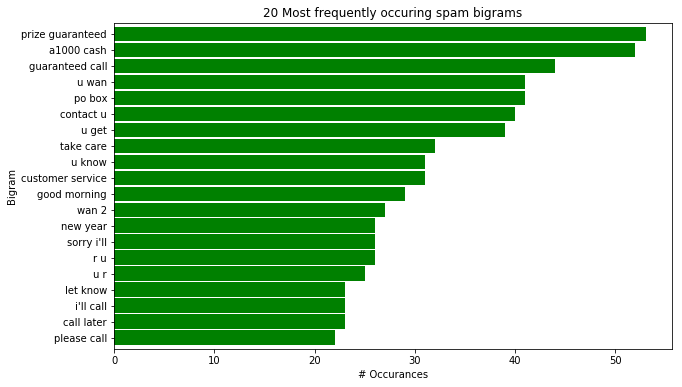

In [43]:
top_20_all_bigrams.sort_values().plot.barh(color='green', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_all_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)


(-0.5, 799.5, 399.5, -0.5)

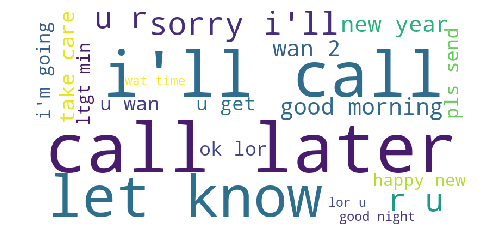

In [36]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

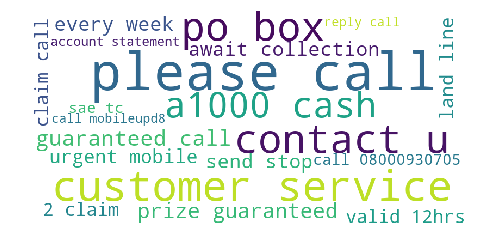

In [40]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

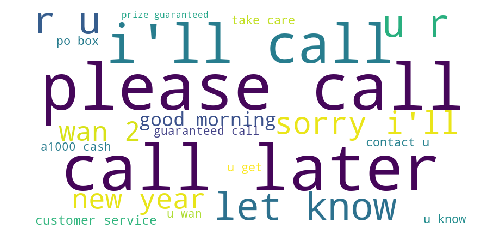

In [45]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_all_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

In [75]:
import acquire
import prepare

In [76]:
blog = pd.DataFrame(prepare.prepare_article_data(acquire.get_blog_articles()))

In [77]:
blog.set_index('title', inplace=True)

In [78]:
blog

,clean,lemmatized,original,stemmed
title,,,,
Codeup’s Data Science Career Accelerator is Here! - Codeup,rumors true time arrived codeup officially ope...,The rumor are true! The time ha arrived. Codeu...,The rumors are true! The time has arrived. Cod...,the rumor are true! the time ha arrived. codeu...
Data Science Myths - Codeup,dimitri antoniou maggie giust data science big...,By Dimitri Antoniou and Maggie Giust Data Scie...,By Dimitri Antoniou and Maggie Giust\nData Sci...,By dimitri antoni and maggi giust data science...
Data Science VS Data Analytics: What’s The Difference? - Codeup,dimitri antoniou week ago codeup launched imme...,"By Dimitri Antoniou A week ago, Codeup launche...","By Dimitri Antoniou\nA week ago, Codeup launch...","By dimitri antoni A week ago, codeup launch ou..."
10 Tips to Crush It at the SA Tech Job Fair - Codeup,10 tips crush sa tech job fair sa tech job fai...,10 Tips to Crush It at the SA Tech Job Fair SA...,10 Tips to Crush It at the SA Tech Job Fair\nS...,10 tip to crush It at the SA tech job fair SA ...
Competitor Bootcamps Are Closing. Is the Model in Danger? - Codeup,competitor bootcamps closing model danger prog...,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamp are closing. Is the model ...


In [133]:
word_list = blog.clean[0].split()
word_list = pd.Series(word_list).value_counts()



(-0.5, 799.5, 399.5, -0.5)

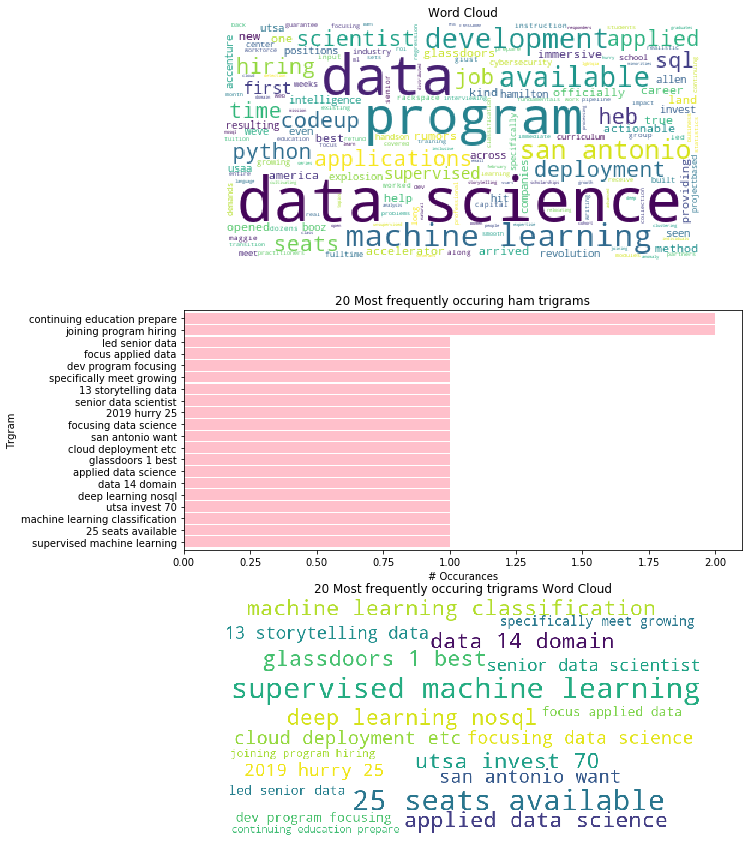

In [134]:
article = blog.clean[0]

top_20_trigrams = (pd.Series(nltk.ngrams(article.split(), 3))
                      .value_counts()
                      .head(20))

plt.figure(figsize=(10,10))

plt.subplot(311)
plt.title('Word Cloud')
img = WordCloud(background_color='white').generate(article)
plt.imshow(img)
plt.axis('off')

plt.subplot(312)
top_20_trigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 15))

plt.title('20 Most frequently occuring ham trigrams')
plt.ylabel('Trgram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' '  + t[2])
_ = plt.yticks(ticks, labels)

plt.subplot(313)
plt.title('20 Most frequently occuring trigrams Word Cloud')
data = {k[0] + ' ' + k[1] + ' '  + k[2]: v for k, v in top_20_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.imshow(img)
plt.axis('off')


(-0.5, 799.5, 399.5, -0.5)

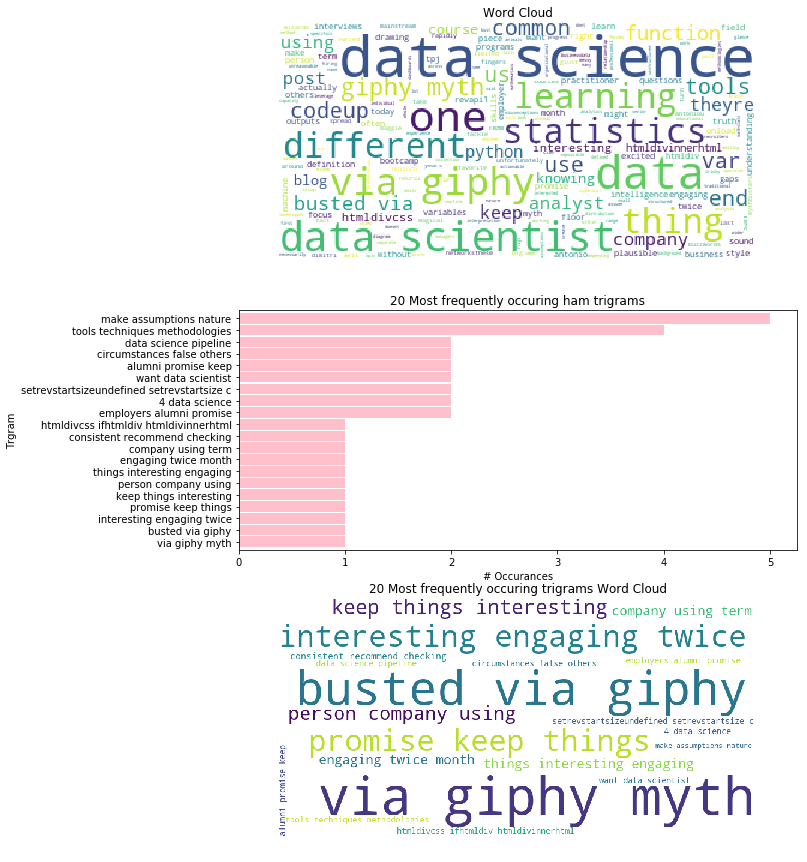

In [135]:
article = blog.clean[1]

top_20_trigrams = (pd.Series(nltk.ngrams(article.split(), 3))
                      .value_counts()
                      .head(20))

plt.figure(figsize=(10,10))

plt.subplot(311)
plt.title('Word Cloud')
img = WordCloud(background_color='white').generate(article)
plt.imshow(img)
plt.axis('off')

plt.subplot(312)
top_20_trigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 15))

plt.title('20 Most frequently occuring ham trigrams')
plt.ylabel('Trgram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' '  + t[2])
_ = plt.yticks(ticks, labels)

plt.subplot(313)
plt.title('20 Most frequently occuring trigrams Word Cloud')
data = {k[0] + ' ' + k[1] + ' '  + k[2]: v for k, v in top_20_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.imshow(img)
plt.axis('off')


(-0.5, 799.5, 399.5, -0.5)

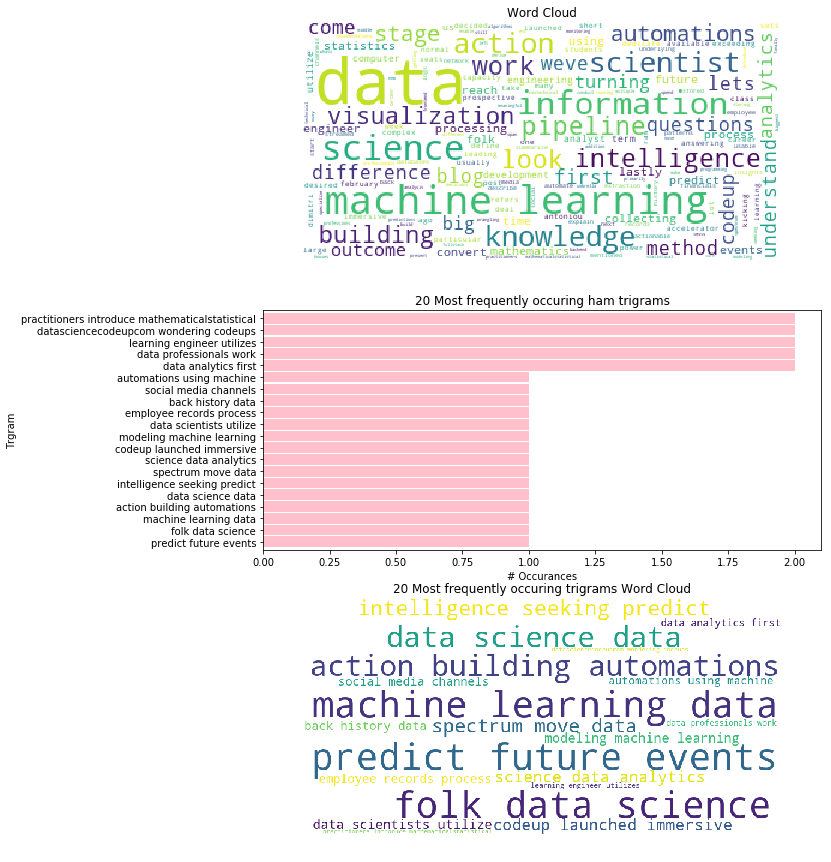

In [136]:
article = blog.clean[2]

top_20_trigrams = (pd.Series(nltk.ngrams(article.split(), 3))
                      .value_counts()
                      .head(20))

plt.figure(figsize=(10,10))

plt.subplot(311)
plt.title('Word Cloud')
img = WordCloud(background_color='white').generate(article)
plt.imshow(img)
plt.axis('off')

plt.subplot(312)
top_20_trigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 15))

plt.title('20 Most frequently occuring ham trigrams')
plt.ylabel('Trgram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' '  + t[2])
_ = plt.yticks(ticks, labels)

plt.subplot(313)
plt.title('20 Most frequently occuring trigrams Word Cloud')
data = {k[0] + ' ' + k[1] + ' '  + k[2]: v for k, v in top_20_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.imshow(img)
plt.axis('off')


(-0.5, 799.5, 399.5, -0.5)

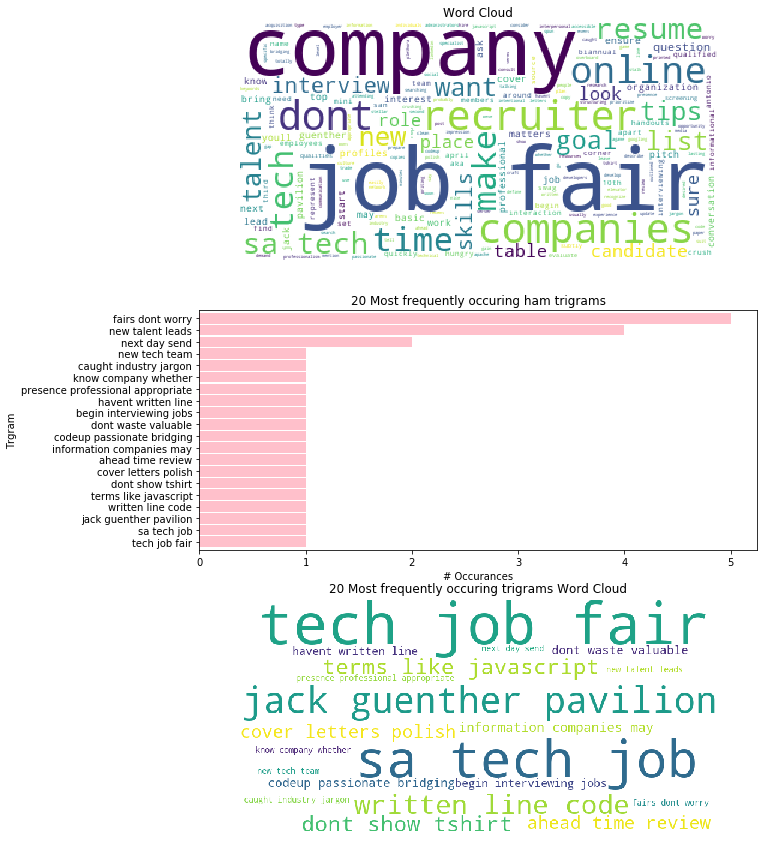

In [137]:
article = blog.clean[3]

top_20_trigrams = (pd.Series(nltk.ngrams(article.split(), 3))
                      .value_counts()
                      .head(20))

plt.figure(figsize=(10,10))

plt.subplot(311)
plt.title('Word Cloud')
img = WordCloud(background_color='white').generate(article)
plt.imshow(img)
plt.axis('off')

plt.subplot(312)
top_20_trigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 15))

plt.title('20 Most frequently occuring ham trigrams')
plt.ylabel('Trgram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' '  + t[2])
_ = plt.yticks(ticks, labels)

plt.subplot(313)
plt.title('20 Most frequently occuring trigrams Word Cloud')
data = {k[0] + ' ' + k[1] + ' '  + k[2]: v for k, v in top_20_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.imshow(img)
plt.axis('off')


(-0.5, 799.5, 399.5, -0.5)

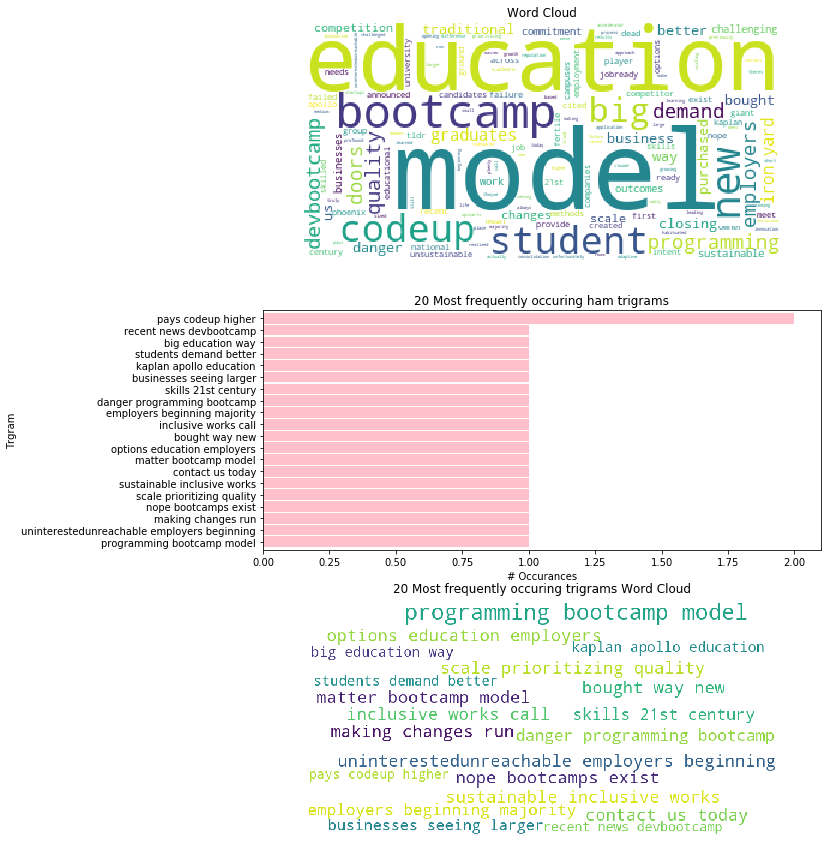

In [138]:
article = blog.clean[4]

top_20_trigrams = (pd.Series(nltk.ngrams(article.split(), 3))
                      .value_counts()
                      .head(20))

plt.figure(figsize=(10,10))

plt.subplot(311)
plt.title('Word Cloud')
img = WordCloud(background_color='white').generate(article)
plt.imshow(img)
plt.axis('off')

plt.subplot(312)
top_20_trigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 15))

plt.title('20 Most frequently occuring ham trigrams')
plt.ylabel('Trgram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' '  + t[2])
_ = plt.yticks(ticks, labels)

plt.subplot(313)
plt.title('20 Most frequently occuring trigrams Word Cloud')
data = {k[0] + ' ' + k[1] + ' '  + k[2]: v for k, v in top_20_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.imshow(img)
plt.axis('off')


(-0.5, 799.5, 399.5, -0.5)

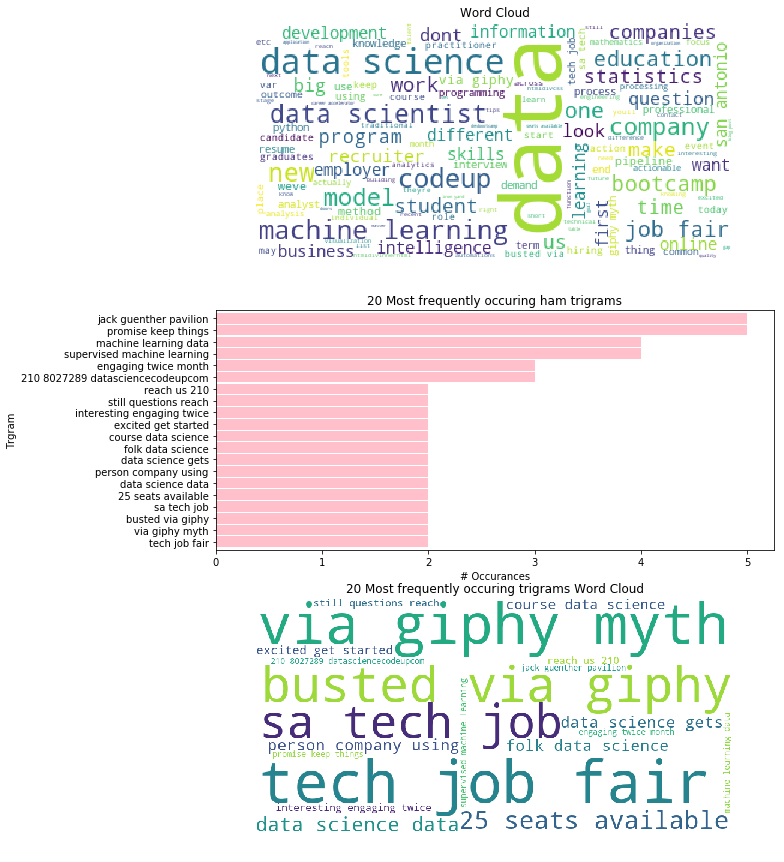

In [150]:
article = blog.clean[0] + blog.clean[1] + blog.clean[2] + blog.clean[3] + blog.clean[4]

top_20_trigrams = (pd.Series(nltk.ngrams(article.split(), 3))
                      .value_counts()
                      .head(20))

plt.figure(figsize=(10,10))

plt.subplot(311)
plt.title('Word Cloud')
img = WordCloud(background_color='white').generate(article)
plt.imshow(img)
plt.axis('off')

plt.subplot(312)
top_20_trigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 15))

plt.title('20 Most frequently occuring ham trigrams')
plt.ylabel('Trgram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' '  + t[2])
_ = plt.yticks(ticks, labels)

plt.subplot(313)
plt.title('20 Most frequently occuring trigrams Word Cloud')
data = {k[0] + ' ' + k[1] + ' '  + k[2]: v for k, v in top_20_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.imshow(img)
plt.axis('off')
